In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.stats import pearsonr
from pathlib import Path

## Accuracy in counting object occurrences

In [2]:
countsdata = pd.read_csv('countsdata.csv')

In [ ]:
corrs = []
toexclude = []
for s in countsdata.subject.unique():
    thissub = countsdata[countsdata.subject==s]
    corr = pearsonr(thissub['count'], thissub['targets'])[0]
    corrs.append(corr)

/home/predatt/giaald/.conda/envs/giacomo37/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/predatt/giaald/.conda/envs/giacomo37/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
q1 = np.quantile(corrs, 0.25)
print(q1)

0.7821174516229188


In [5]:
q3 = np.quantile(corrs, 0.75)
print(q3)

0.9783687318519823


In [6]:
iqr = q3 - q1
print(iqr)

0.19625128022906346


In [7]:
q1 - 1.5 * iqr

0.4877405312793236

In [12]:
to_exclude = [i+1 for i, c in enumerate(corrs) if c < q1 - 2 * iqr]
excluded_corrs = [c for c in corrs if c < q1 - 2 * iqr]

In [13]:
excluded_corrs

[-0.5920141630322447,
 0.07159109398550215,
 -0.46359472715719857,
 0.14907119849998596]

In [11]:
to_exclude

[9, 19, 22, 26]

In [12]:
overallcounts = countsdata.groupby(['subject']).sum().reset_index().drop(columns=['run'])
overallcounts['correlation'] = corrs

In [26]:
sns.__version__

'0.11.2'

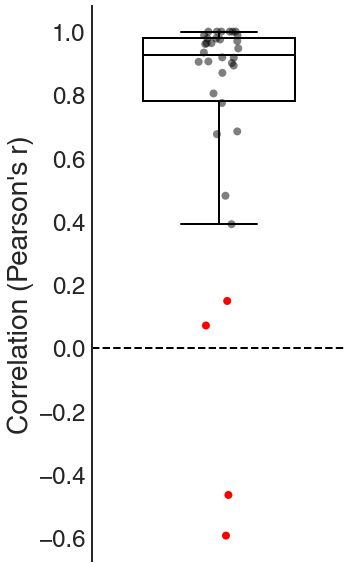

In [51]:
fig = plt.figure(figsize=(5,8))
fpath = Path("./fonts/HelveticaWorld-Regular.ttf")
with sns.axes_style('white'):
    #ax1 = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot()
    # sns.violinplot(y='correlation', data=overallcounts[~overallcounts['subject'].isin(to_exclude)], 
    #                color=".8", inner=None, scale='count', cut=0.0)
    sns.stripplot(y='correlation', data=overallcounts[~overallcounts['subject'].isin(to_exclude)],
                  jitter=0.08, color='black', size=8, alpha=.5)
    sns.stripplot(y='correlation', data=overallcounts[overallcounts['subject'].isin(to_exclude)],
                  jitter=0.08, color='red', size=8, alpha=1.)
    sns.boxplot(y='correlation', data=overallcounts, width=0.6, whis=2., 
                linewidth=2., saturation=1, fliersize=0, color='white',
                medianprops=dict(color='black', alpha=1.),
                boxprops=dict(edgecolor='black'), whiskerprops=dict(color='black', alpha=1.),
                capprops=dict(color='black', alpha=1.))
    # Get mean and 95% CI:
    meanerr = overallcounts['correlation'].median()
    tstats = pg.ttest(overallcounts['correlation'], 0.0)
    ci95 = tstats['CI95%'][0]
    #plt.gca().set_aspect('equal')
    #ax1.axis('equal')
    #lower = overallcounts['correlation'].mean() - overallcounts['correlation'].sem() #ci95[0]
    #upper = overallcounts['correlation'].mean() + overallcounts['correlation'].sem()#ci95[1]
    #for tick in ax1.get_xticks():
        #ax1.plot([tick-0.05, tick+0.05], [meanerr, meanerr],
        #            lw=4, color='k')
        # ax1.plot([tick, tick], [lower, upper], lw=3, color='k')
        # ax1.plot([tick-0.01, tick+0.01], [lower, lower], lw=3, color='k')
        # #ax1.plot([tick-0.1, tick+0.1], [lower-overallcounts['corr'].std(), lower-overallcounts['corr'].std()], lw=3, color='k')
        # ax1.plot([tick-0.01, tick+0.01], [upper, upper], lw=3, color='k')
        # circlemarker = matplotlib.patches.Ellipse((tick+0.0032, meandiff), 0.06, 0.02, color='k')
        # ax1.add_patch(circlemarker)
       
    #ax1.axhline(0.0, linestyle='--', color='black')
    plt.yticks(font=fpath, fontsize=24) 
    ax1.set_ylabel('Correlation (Pearson\'s r)', font=fpath, fontsize=28)
    #ax1.set(ylim=(0, 1.05))
    #ax1.set(xlim=(-0.2, 0.2))
    ax1.axes_style = 'white'
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_linewidth(2)
    ax1.axhline(0.0, color='k', linestyle='--', linewidth=2.)
plt.tight_layout()
plt.savefig('results_plots/behav_correlations.svg')

## Demographics

In [2]:
subjdemofile = '../../../bids/participants.tsv'
subjdemo = pd.read_csv(subjdemofile, sep='\t')

In [4]:
to_exclude = ['sub-{:03d}'.format(s) for s in [9, 22, 19, 26]]
subjdemo = subjdemo[~subjdemo['participant_id'].isin(to_exclude)]